In [ ]:
!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from deap import tools, algorithms, base, creator

In [ ]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10 # Define the number of locations (eg 10)


locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(num_locations)]
            # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = (50,50) # Define the coordinates for the depot

num_vehicles = 3 # Define the number of vehicles - (eg 3)
print(locations)

[(5, 63), (56, 79), (5, 6), (99, 100), (52, 65), (73, 30), (74, 17), (26, 21), (5, 42), (23, 60)]


In [ ]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# HINT CODE

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot

    for i in range(num_vehicles):                           # Route for each vehicle in array
      vehicle_route = [depot]
      for j in range(i,len(locations),num_vehicles):
        vehicle_route.append(locations[individual[j]])
      vehicle_route.append(depot)
      #print(vehicle_route, end="\n")

      vehicle_distance = 0                                  # Calculating total distance for each vehicle
      for v in range(len(vehicle_route)-1):
        vehicle_distance += math.sqrt(((vehicle_route[v+1][0] - vehicle_route[v][0])**2) + ((vehicle_route[v+1][1] - vehicle_route[v][1])**2))

      total_distance += vehicle_distance
      distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [ ]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [30]:
#TASK 8 - Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    for x, y in locations:
      plt.plot(x, y, 'go')
    plt.plot(depot[0], depot[1], 'ro')

    for i in range(num_vehicles):
      vehicle_route = [depot]
      for j in range(i,len(locations),num_vehicles):
        vehicle_route.append(locations[individual[j]])
      vehicle_route.append(depot)

      x_coord = [x for x, y in vehicle_route]
      y_coord = [y for x, y in vehicle_route]
      plt.plot(x_coord, y_coord, '-', 'o')

    plt.title("OPTIMAL ROUTE")
    plt.xlabel("X COORDINATES")
    plt.ylabel("Y COORDINATES")
    plt.show()




Streaming output truncated to the last 5000 lines.
[(50, 50), (23, 60), (74, 17), (56, 79), (5, 6), (50, 50)]
[(50, 50), (5, 42), (52, 65), (99, 100), (50, 50)]
[(50, 50), (73, 30), (5, 63), (26, 21), (50, 50)]
[(50, 50), (23, 60), (5, 63), (5, 42), (5, 6), (50, 50)]
[(50, 50), (52, 65), (56, 79), (99, 100), (50, 50)]
[(50, 50), (73, 30), (74, 17), (26, 21), (50, 50)]
[(50, 50), (23, 60), (5, 63), (5, 42), (5, 6), (50, 50)]
[(50, 50), (73, 30), (56, 79), (99, 100), (50, 50)]
[(50, 50), (74, 17), (52, 65), (26, 21), (50, 50)]
[(50, 50), (23, 60), (5, 63), (5, 42), (5, 6), (50, 50)]
[(50, 50), (52, 65), (56, 79), (99, 100), (50, 50)]
[(50, 50), (73, 30), (74, 17), (26, 21), (50, 50)]
[(50, 50), (23, 60), (5, 63), (5, 42), (5, 6), (50, 50)]
[(50, 50), (52, 65), (56, 79), (99, 100), (50, 50)]
[(50, 50), (73, 30), (74, 17), (26, 21), (50, 50)]
[(50, 50), (23, 60), (5, 63), (5, 42), (5, 6), (50, 50)]
[(50, 50), (52, 65), (56, 79), (99, 100), (50, 50)]
[(50, 50), (73, 30), (74, 17), (26, 21),

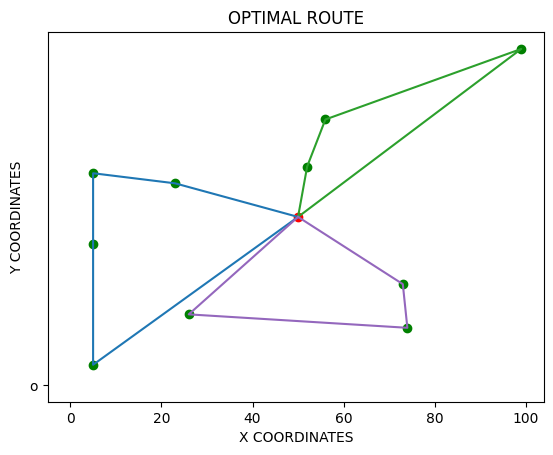

In [31]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()